In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import joblib

In [2]:
dfc = pd.read_csv('/content/clean_data.csv')

In [3]:
dfc.head()

,FTI,T3,T4U,TSH,TT4,age,goitre,hypopituitary,lithium,on_antithyroid_medication,...,psych,query_hyperthyroid,query_hypothyroid,query_on_thyroxine,referral_source,sex,sick,thyroid_surgery,tumor,class
0,31.0,4.8,0.475,0.050,32.0,38.0,f,f,f,f,...,f,f,f,f,other,M,f,f,f,Negative
1,80.0,2.0,0.890,0.015,71.0,30.0,f,f,f,f,...,f,f,f,f,SVI,F,f,f,f,Negative
2,98.0,1.4,0.960,5.950,95.0,36.0,f,f,f,f,...,f,f,f,f,SVI,F,f,f,f,Hyperthyroid
3,92.0,0.0,0.980,1.700,90.0,79.0,f,f,f,f,...,f,f,f,f,SVI,M,t,f,f,Negative
4,92.0,2.5,1.060,0.600,98.0,70.0,f,f,f,f,...,f,f,f,f,other,F,f,f,f,Negative


In [4]:
dfc.corr()

<ipython-input-4-b65f3a0a07eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfc.corr()


,FTI,T3,T4U,TSH,TT4,age
FTI,1.000000,0.137103,0.262521,-0.230204,0.748016,0.086670
T3,0.137103,1.000000,0.205380,-0.072128,0.299514,-0.070889
T4U,0.262521,0.205380,1.000000,0.124627,0.494989,-0.055210
TSH,-0.230204,-0.072128,0.124627,1.000000,-0.202540,0.071416
TT4,0.748016,0.299514,0.494989,-0.202540,1.000000,-0.014524
age,0.086670,-0.070889,-0.055210,0.071416,-0.014524,1.000000


<ipython-input-5-3e2de2e27c14>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dfc.corr()


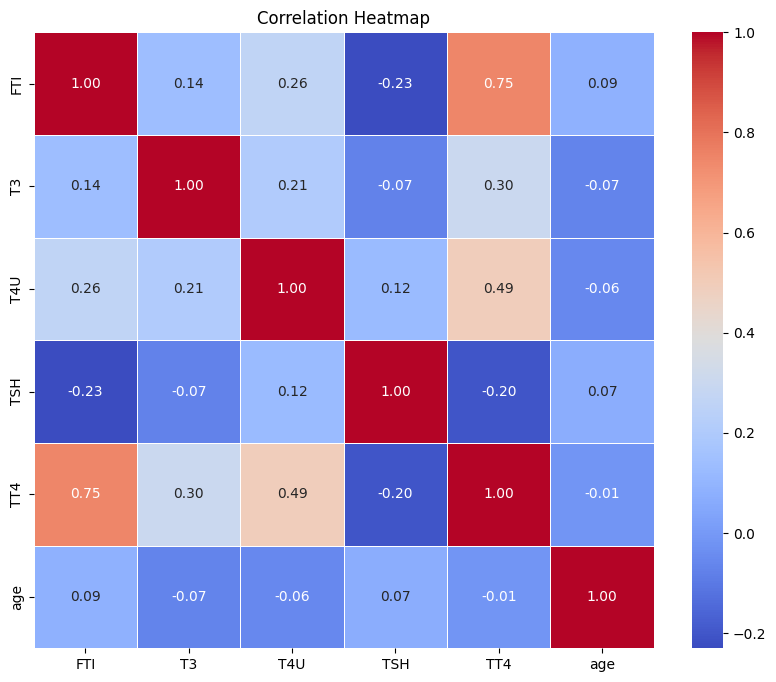

In [5]:
correlation_matrix = dfc.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [6]:
dfc.drop('referral_source', axis=1, inplace= True)

In [8]:
dfc.replace({'f':0 , 't':1}, inplace= True)
dfc.replace({'M':1,'F':0},inplace=True)
dfc.replace({'Negative':0 , 'Hypothyroid':1,'Hyperthyroid':2}, inplace= True)

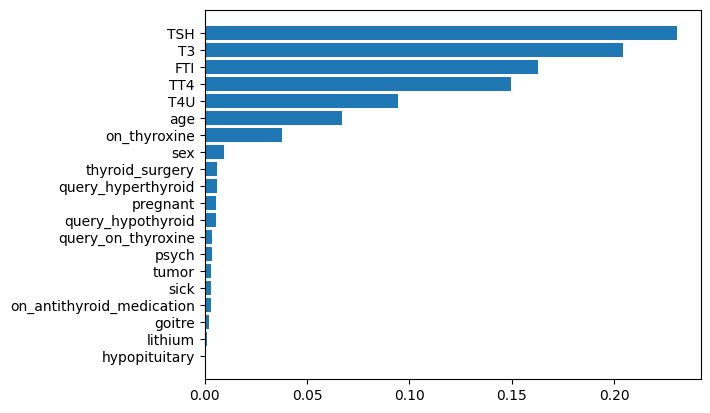

In [9]:
X = dfc.drop('class', axis=1)
y = dfc['class']

model = RandomForestClassifier()
model.fit(X, y)

feature_importance = model.feature_importances_
sorted_idx = feature_importance.argsort()

plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.show()

In [10]:
X = dfc.drop('class', axis=1)
y = dfc['class']

model = RandomForestClassifier()

rfe = RFE(model, n_features_to_select=5)

X_rfe = rfe.fit_transform(X, y)

selected_features = pd.DataFrame({'Feature': X.columns, 'Selected': rfe.support_, 'Ranking': rfe.ranking_})
print(selected_features)

X_selected = pd.DataFrame(X_rfe, columns=X.columns[rfe.support_])
print(X_selected)

                      Feature  Selected  Ranking
0                         FTI      True        1
1                          T3      True        1
2                         T4U      True        1
3                         TSH      True        1
4                         TT4      True        1
5                         age     False        2
6                      goitre     False       14
7               hypopituitary     False       16
8                     lithium     False       15
9   on_antithyroid_medication     False       11
10               on_thyroxine     False        3
11                   pregnant     False        8
12                      psych     False        9
13         query_hyperthyroid     False        6
14          query_hypothyroid     False        7
15         query_on_thyroxine     False       13
16                        sex     False        4
17                       sick     False       12
18            thyroid_surgery     False        5
19                  

In [11]:
sf = dfc[['FTI','T3','T4U','TSH','TT4','age','on_thyroxine','sex','class']]
sf.head()

,FTI,T3,T4U,TSH,TT4,age,on_thyroxine,sex,class
0,31.0,4.8,0.475,0.050,32.0,38.0,0,1,0
1,80.0,2.0,0.890,0.015,71.0,30.0,0,0,0
2,98.0,1.4,0.960,5.950,95.0,36.0,0,0,2
3,92.0,0.0,0.980,1.700,90.0,79.0,0,1,0
4,92.0,2.5,1.060,0.600,98.0,70.0,0,0,0


In [12]:
x = sf.drop(columns='class',axis=1)
y = sf['class']

In [13]:
sc = StandardScaler()
sc.fit(x)
x = sc.transform(x)

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
prd = lr.predict(x_test)
acc = round(accuracy_score(prd,y_test)*100)
print('Logistic Regression accuracy :',acc,'%')

Logistic Regression accuracy : 79 %


In [16]:
svcl = SVC()
svcl.fit(x_train,y_train)
sprd = svcl.predict(x_test)
sacc = round(accuracy_score(sprd,y_test)*100)
print('Support Vector Classifier accuracy :',sacc,'%')

Support Vector Classifier accuracy : 86 %


In [17]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dprd = dtc.predict(x_test)
dacc = round(accuracy_score(dprd,y_test)*100)
print('DecisionTree Classifier accuracy :',dacc,'%')

DecisionTree Classifier accuracy : 93 %


In [18]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rprd = rf.predict(x_test)
rfa = round(accuracy_score(rprd,y_test)*100)
print('Random Forest Classifier accuracy :',rfa,'%')

Random Forest Classifier accuracy : 93 %


In [19]:
nbc = GaussianNB()
nbc.fit(x_train,y_train)
nprd = nbc.predict(x_test)
nacc = round(accuracy_score(nprd,y_test)*100)
nacc
print('Random Forest Classifier accuracy :',rfa,'%')

Random Forest Classifier accuracy : 93 %


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_


In [22]:
best_rf = RandomForestClassifier(max_depth=20,min_samples_leaf=2,min_samples_split=5,n_estimators=50)
best_rf.fit(x_train, y_train)
brprd = best_rf.predict(x_test)
brfa = round(accuracy_score(brprd,y_test)*100)
print('Hyper tuned Random Forest Classifier accuracy :',brfa,'%')

Hyper tuned Random Forest Classifier accuracy : 93 %


In [26]:
xgboost_model = XGBClassifier()
xgboost_model.fit(x_train, y_train)
xgboost_pred = xgboost_model.predict(x_test)
xgboost_acc = accuracy_score(xgboost_pred, y_test)

print("XGBoost Accuracy:", round(xgboost_acc*100),'%')

XGBoost Accuracy: 93 %


In [ ]:
xgboost_model = XGBClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

grid_search = GridSearchCV(xgboost_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_

In [29]:
best_xgboost = XGBClassifier(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=7,
    min_child_weight=3,
    n_estimators=50,
    subsample=1.0
)
best_xgboost.fit(x_train, y_train)
xgboost_pred = best_xgboost.predict(x_test)
xgboost_acc = round(accuracy_score(xgboost_pred, y_test)*100)
print("Hyper tuned XGBoost Accuracy:",xgboost_acc,'%')

Hyper tuned XGBoost Accuracy: 94 %


In [33]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression',
              'Random Forest Classifier',
              'Decisiontree Classifier',
              'SVC' ,
               'Naive Bayes',
               'XGBClassifier'
              ],
    'Score': [acc,
              brfa,
              dacc,
              sacc,
              nacc,
              xgboost_acc]
           })
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df

,Model,Score
0,XGBClassifier,94
1,Random Forest Classifier,93
2,Decisiontree Classifier,93
3,SVC,86
4,Naive Bayes,80
5,Logistic Regression,79


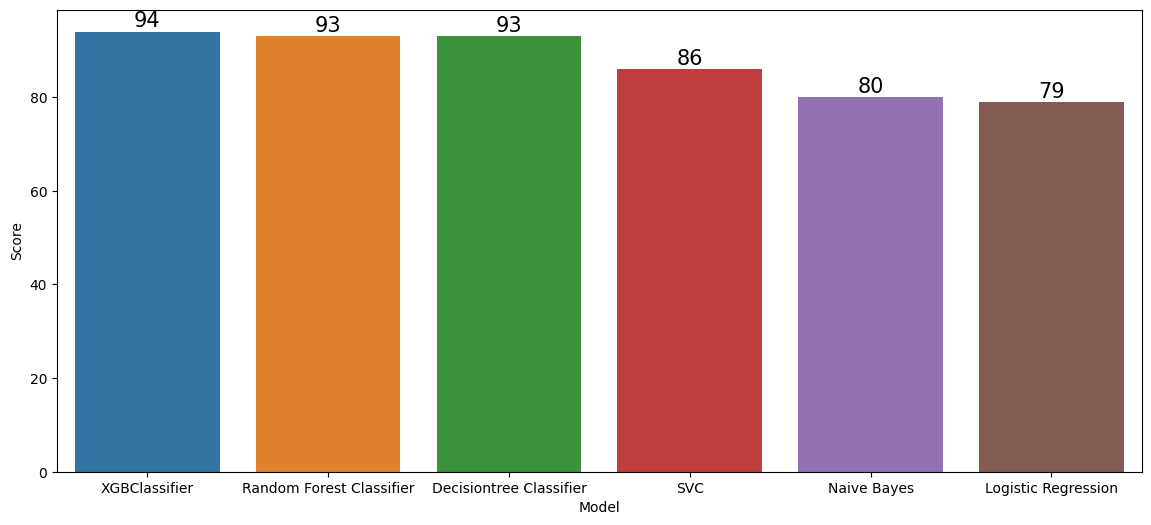

In [34]:
plt.subplots(figsize=(14,6))
ax=sns.barplot(x='Model',y="Score",data=result_df)
labels = (result_df["Score"])
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 15, color = 'black')

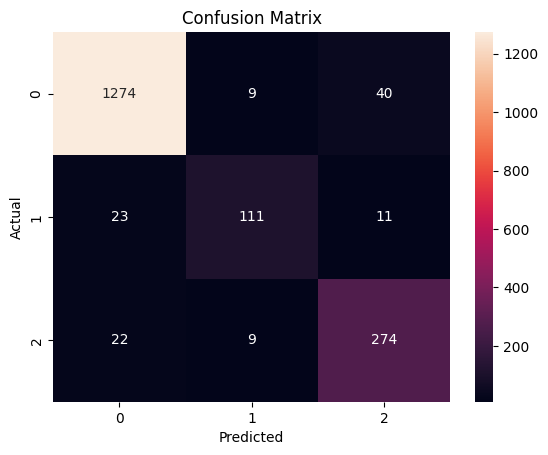

In [31]:
cf_matrix = confusion_matrix(y_test,xgboost_pred)
sns.heatmap(cf_matrix,annot=True,fmt='d')
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

In [36]:
print(classification_report(y_test,xgboost_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1323
           1       0.86      0.77      0.81       145
           2       0.84      0.90      0.87       305

    accuracy                           0.94      1773
   macro avg       0.89      0.88      0.88      1773
weighted avg       0.94      0.94      0.94      1773



In [38]:
joblib.dump(sc,'std.joblib')
joblib.dump(best_xgboost,'xgbcl.joblib')

['xgbcl.joblib']